In [1]:
import tensorflow as tf
from keras import models,layers
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
def load_car_data():
    # Loading dataset and Dropping Car_Name column
    data = pd.read_csv("./car.csv")
    data.drop("Car_Name",axis=1,inplace=True)

    # Qualitative attributes to numerical representation
    data = pd.get_dummies(data=data,drop_first=True)
    
    # Fixing attribute `Years` to `Years old`
    data["Year"] = 2021 - data["Year"].to_numpy()
    
    return data 

In [5]:
# Loading data
car_dataset = load_car_data()

# Defining Attributes
y_attr = "Selling_Price"
x_attr = car_dataset.columns.tolist()
x_attr.remove(y_attr)

# Spliting dataset into training set and test set
train = car_dataset.iloc[:210].copy()
test = car_dataset.iloc[210:].copy()

# Fitting MinMaxScaler base on `train set`. Then transforming `train set `and `test set`.
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(train)
train[train.columns] = scaler.transform(train)
test[test.columns] = scaler.transform(test)

# Spliting into X,y
X_train = train[x_attr]
X_test = test[x_attr]
y_train = train[y_attr]
y_test = test[y_attr]

In [6]:
# Creating Callback to save model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath="/content/drive/MyDrive/checkpoints/exa1/weights.h5",
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 verbose=1)

# Defining model architecture
model = models.Sequential()
model.add(layers.Dense(128, kernel_initializer='normal',input_shape = (X_train.shape[1],), activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(layers.Dense(256, kernel_initializer='normal',activation='sigmoid'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(layers.Dense(256, kernel_initializer='normal',activation='sigmoid'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(layers.Dense(256, kernel_initializer='normal',activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(layers.Dense(1, kernel_initializer='normal',activation='linear'))

# Compiling model
model.compile(optimizer='adam',loss="mse",metrics=['mae'])

In [7]:
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test,y_test),
                    epochs=250,
                    batch_size=1,
                    callbacks=[cp_callback])

Epoch 1/250
210/210 [==============================] - 1s 3ms/step - loss: 0.0986 - mae: 0.2239 - val_loss: 0.0074 - val_mae: 0.0764

Epoch 00001: val_loss improved from inf to 0.00740, saving model to /content/drive/MyDrive/checkpoints/exa1/weights.h5
Epoch 2/250
210/210 [==============================] - 1s 2ms/step - loss: 0.0226 - mae: 0.1039 - val_loss: 0.0055 - val_mae: 0.0570

Epoch 00002: val_loss improved from 0.00740 to 0.00548, saving model to /content/drive/MyDrive/checkpoints/exa1/weights.h5
Epoch 3/250
210/210 [==============================] - 1s 3ms/step - loss: 0.0115 - mae: 0.0760 - val_loss: 0.0083 - val_mae: 0.0737

Epoch 00003: val_loss did not improve from 0.00548
Epoch 4/250
210/210 [==============================] - 0s 2ms/step - loss: 0.0085 - mae: 0.0540 - val_loss: 0.0041 - val_mae: 0.0504

Epoch 00004: val_loss improved from 0.00548 to 0.00410, saving model to /content/drive/MyDrive/checkpoints/exa1/weights.h5
Epoch 5/250
210/210 [===========================

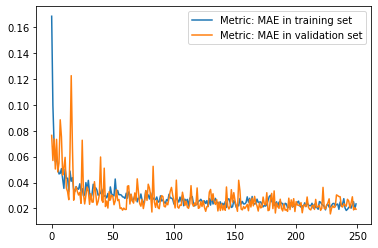

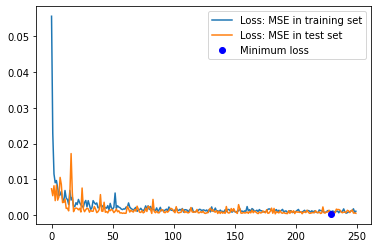

Best epoch:  229
MAE Validation Best Epoch: 0.02007131837308407
MSE Validation Best Epoch: 0.0006313210469670594


In [8]:
loss = history.history['loss']
val_loss = history.history['val_loss']
min_val_loss = min(val_loss)
min_val_loss_epoch= val_loss.index(min(val_loss)) + 1

# Plot history base on Metric 
plt.plot(history.history['mae'], label='Metric: MAE in training set')
plt.plot(history.history['val_mae'], label='Metric: MAE in validation set')
plt.legend()
plt.show()

# Plot history base on Loss
plt.plot(history.history['loss'], label='Loss: MSE in training set')
plt.plot(history.history['val_loss'], label='Loss: MSE in test set')
plt.plot(min_val_loss_epoch, min_val_loss, 'bo', label='Minimum loss')
plt.legend()
plt.show()

print('Best epoch: ', min_val_loss_epoch)
print('MAE Validation Best Epoch:', history.history['val_mae'][min_val_loss_epoch])
print('MSE Validation Best Epoch:', history.history['val_loss'][min_val_loss_epoch])

In [9]:
# Predictign
y_pred = model.predict(X_test)

# inversing real value 
mock_df = test.copy()
mock_df[test.columns] = scaler.inverse_transform(test)
y_test = mock_df[y_attr]

# inversing prediction
mock_df = test.copy()
mock_df[y_attr] = y_pred
mock_df[test.columns] = scaler.inverse_transform(mock_df)
y_pred = mock_df[y_attr]

# Getting the range of values
yrange = range(len(y_pred))

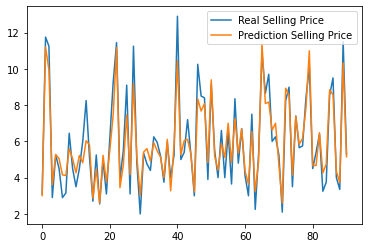

In [11]:
#Plotting the Real Values against the predictions
plt.plot(yrange, y_test , label='Real Selling Price')
plt.plot(yrange,y_pred ,label='Prediction Selling Price')
plt.legend()
plt.show()

In [4]:
# Mounting my goolge drive to save the good weights
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive
